<a href='https://www.hexnbit.com/'> <img src='hexnbit.png'/> </a>

# Decision Tree with Python

## IRIS Dataset

The data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant. <br>
The data set contains some features of the plant and corresponding species.<br>
Using the dataset, we will train our machine learning model such that the model is able to predict the species based on the values of these parameters.

### Importing Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Loading Data Set

In [2]:
from sklearn.datasets import load_iris   # data set already exists in sklearn

In [3]:
data=load_iris()
type(data)

sklearn.utils.Bunch

### Available Keys in Dataset

In [4]:
print(data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


### Printing Description of Iris Dataset

In [5]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Important to note from the description above is the Attribute Info, Class Info and correlations

### Creating Pandas Data Frame

Data will be fetcched from "data" key of the IRIS dataset and column names will be the feature names

In [6]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Getting Corelations

In [8]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


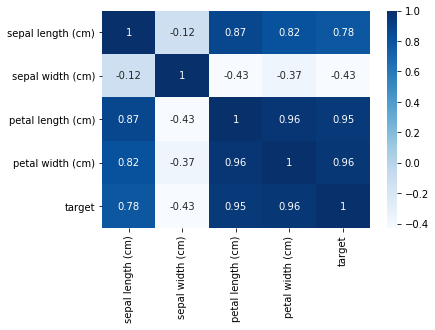

In [9]:
sns.heatmap(df.corr(),annot=True,cmap="Blues")

It can be observed that taget is very closely related to Petal Width and Petal Length. The same was also mentioned in the description

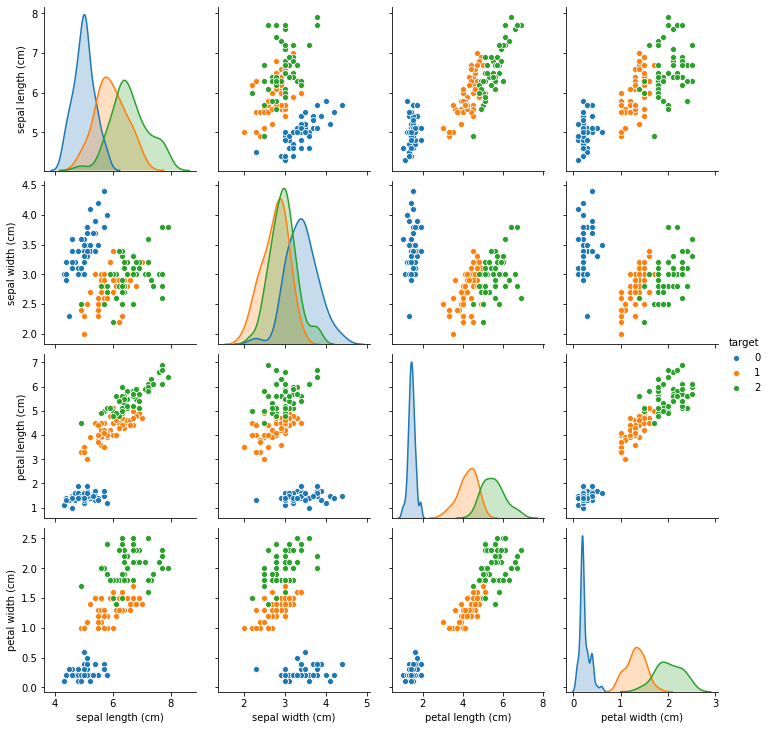

In [10]:
sns.pairplot(df, hue="target")

### Splitting Data for Training and Testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df.drop(['target'],axis=1)    # inputs are all columns except target columns
Y=df['target']                  # target is the output variable 

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=101)

### Decision Tree Classifier Init, Training and Prediction

In [14]:
#Decision Tree Classified is from the tree family
from sklearn.tree import DecisionTreeClassifier

In [15]:
# the estimator supports both criterias, entropy as well as gini impurity, any one of the 2 can be chosen as per the need
# max_depth refers to the level in tree
model = DecisionTreeClassifier(max_depth = 6,random_state = 0,criterion = "entropy")
#model = DecisionTreeClassifier(max_depth = 6,random_state = 0,criterion = "gini")

In [16]:
model.fit(X_train, Y_train)    # training model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [17]:
predictions=model.predict(X_test)   # predicting output values for corresponding test data

### Creating DataFame to roughly compare actual outputs and predicted outputs

In [18]:
compare=pd.DataFrame({"Actual":Y_test,"Predicted":predictions})

In [19]:
compare

,Actual,Predicted
33,0,0
16,0,0
43,0,0
129,2,1
50,1,1
123,2,2
68,1,1
53,1,1
146,2,2
1,0,0


### Model Evaluation

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Visualising Decision Tree

In [22]:
from sklearn import tree

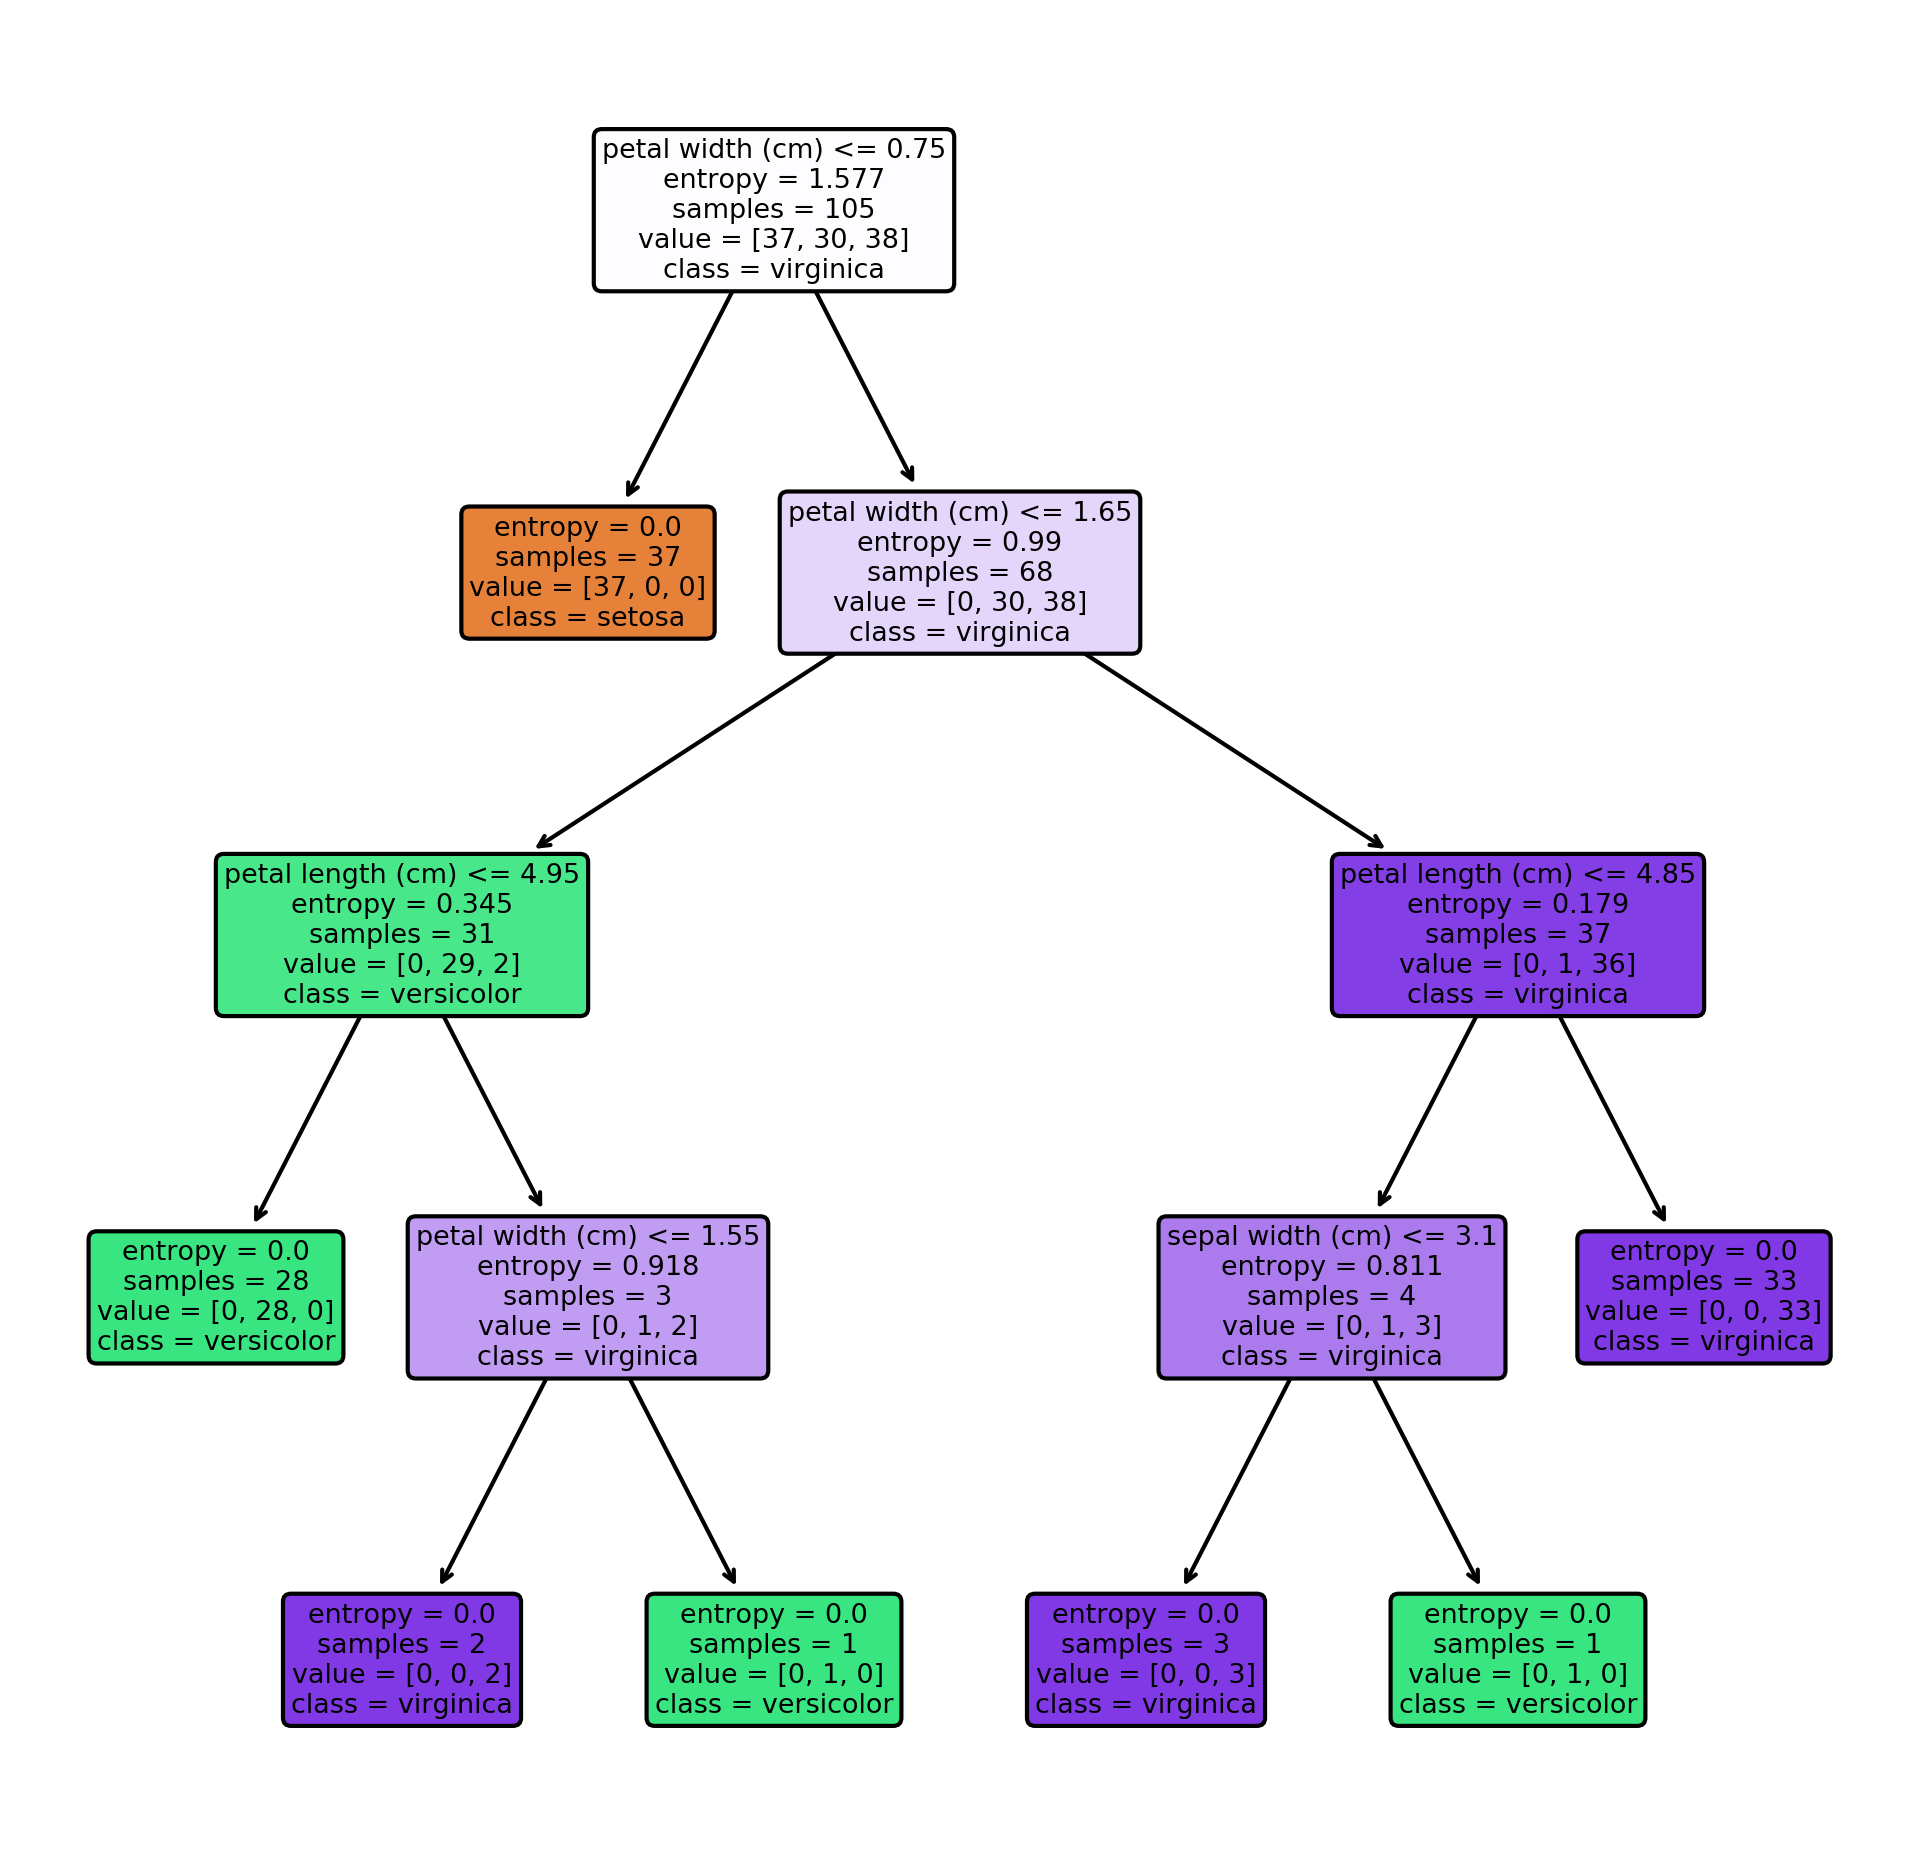

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(model,feature_names = data['feature_names'],class_names=data['target_names'],filled = True,rounded=True);
#fig.savefig('imagename.png')